## _Data Cleaning and Exploratory Data Analysis_

### Imports & Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visulization 
from wordcloud import WordCloud, STOPWORDS# visulization for Wordcloud 
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords 
from collections import defaultdict
from collections import Counter
import emoji # remove emoji from text
import string
import spacy # entity recognition
from string import digits
import contractions # expand contraction
from textblob import TextBlob # sentiment analysis 
from PIL import Image # read image
from os import path

In [2]:
data = pd.read_csv('../data/reddit_data.csv')

data.head()

In [3]:
data.shape # understanding the data shape. 

(3190, 2)

### Data Cleaning

#### _Find `NaN` Values_

In [4]:
data.isnull().sum()

title        0
subreddit    0
dtype: int64

#### _Remove Duplicates in `title` column_

In [5]:
data.drop_duplicates(subset = ['title'],keep ='first')

,title,subreddit
0,NAKD becoming EV company,StockMarket
1,Biotech Due Diligence,StockMarket
2,IREN,StockMarket
3,Beginner- can someone explain why IREN is perf...,StockMarket
4,trading site,StockMarket
...,...,...
3184,"Remember guys, Crypto has no political affilia...",CryptoCurrency
3185,Newbie lvl 99,CryptoCurrency
3187,Airdrop advice,CryptoCurrency
3188,Paradigm launches $2.5bn fund for ‘next genera...,CryptoCurrency


##### _Removing duplicates values in column `title` as `title` will be the independent variables for our model. Duplicates are case of nonrandom variables, It would be bias to fit into models. Additionally, it will lead to overfit models._

#### _Remove Emojis_

In [6]:
data['clean_title'] = data['title'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

##### _In some cases, emojis provide many information regarding people's emotions. However, in this project, as the goal is to sell target ads, emojis are less important for our analysis._

#### _Change `y` to Numerical Value_

In [7]:
data['cat_subreddit'] = data['subreddit'].map({'StockMarket':1, 'CryptoCurrency':0})

##### _In this project, we are predict weather a subreddit is `StockMarket` or `CryptoCurrency`. For better fitting into models, the categorical `y` variables are converted to numerical value `1` and `0` (binary)._

#### _Lower case all text_

In [8]:
data['clean_title'] = data['clean_title'].apply(lambda x: x.lower())

##### _Lower case all text. This step helps simplify the analysis and maintain the consistency of all of text._

#### _Removing all punctuation_

In [9]:
data['clean_title']= data['clean_title'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)) # remove punctuations

##### _All punctuation is removed, as they are less relevant to this project's analysis._

#### _Expanding Contractions_

In [10]:
data['clean_title'] = data['clean_title'].apply(lambda x: contractions.fix(x)) # expand contractions

##### _Expanding contractions will help the analysis and also reduce the dimensionality of the document-term matrix._

#### _Removing Hyperlinks._

In [11]:
data['clean_title'] = data['clean_title'].apply(lambda x: re.sub(r"http\S+","",x)) # remove hyperlinks. 

##### _Removing hyperlinks as it irrelevant to the analysis._

#### _Counting Words and Characters_

In [12]:
data['word_count'] = data['clean_title'].str.split().str.len() 

In [13]:
data['character_count'] = data['clean_title'].str.len() 

##### _`word_count` and `character_count` will help to understand the difference between the two categories if there is any. Distribution of these attributes will be plotted later in this notebook._

#### _Checking `NaN` Again_

In [14]:
data.dropna(inplace = True)

In [15]:
data.isnull().sum()

title              0
subreddit          0
clean_title        0
cat_subreddit      0
word_count         0
character_count    0
dtype: int64

In [16]:
data.shape

(3190, 6)

In [17]:
data.head(-10)

,title,subreddit,clean_title,cat_subreddit,word_count,character_count
0,NAKD becoming EV company,StockMarket,nakd becoming ev company,1,4,24
1,Biotech Due Diligence,StockMarket,biotech due diligence,1,3,21
2,IREN,StockMarket,iren,1,1,4
3,Beginner- can someone explain why IREN is perf...,StockMarket,beginner can someone explain why iren is perfo...,1,12,74
4,trading site,StockMarket,trading site,1,2,12
...,...,...,...,...,...,...
3175,hello community I want to present you a new to...,CryptoCurrency,hello community i want to present you a new to...,0,19,90
3176,What did you buy during this flash sale?,CryptoCurrency,what did you buy during this flash sale,0,8,39
3177,Crypto exchanges may slow down on advertising ...,CryptoCurrency,crypto exchanges may slow down on advertising ...,0,12,77
3178,Get yourself free 200 UHIVE METAVERSE TOKENS W...,CryptoCurrency,get yourself free 200 uhive metaverse tokens w...,0,10,59


##### _Lots of data cleaning steps have been processed. Checking and removing `NaN` is very important part to finalize data cleaning steps. For example, there may be a cell in `title` contains only hyperlinks or emojis and based on previous steps, they have been removed which will result a `NaN` in that cell._ 

### Exploratory Data Analysis

#### _Words Count Distributions_

<Figure size 1152x576 with 0 Axes>

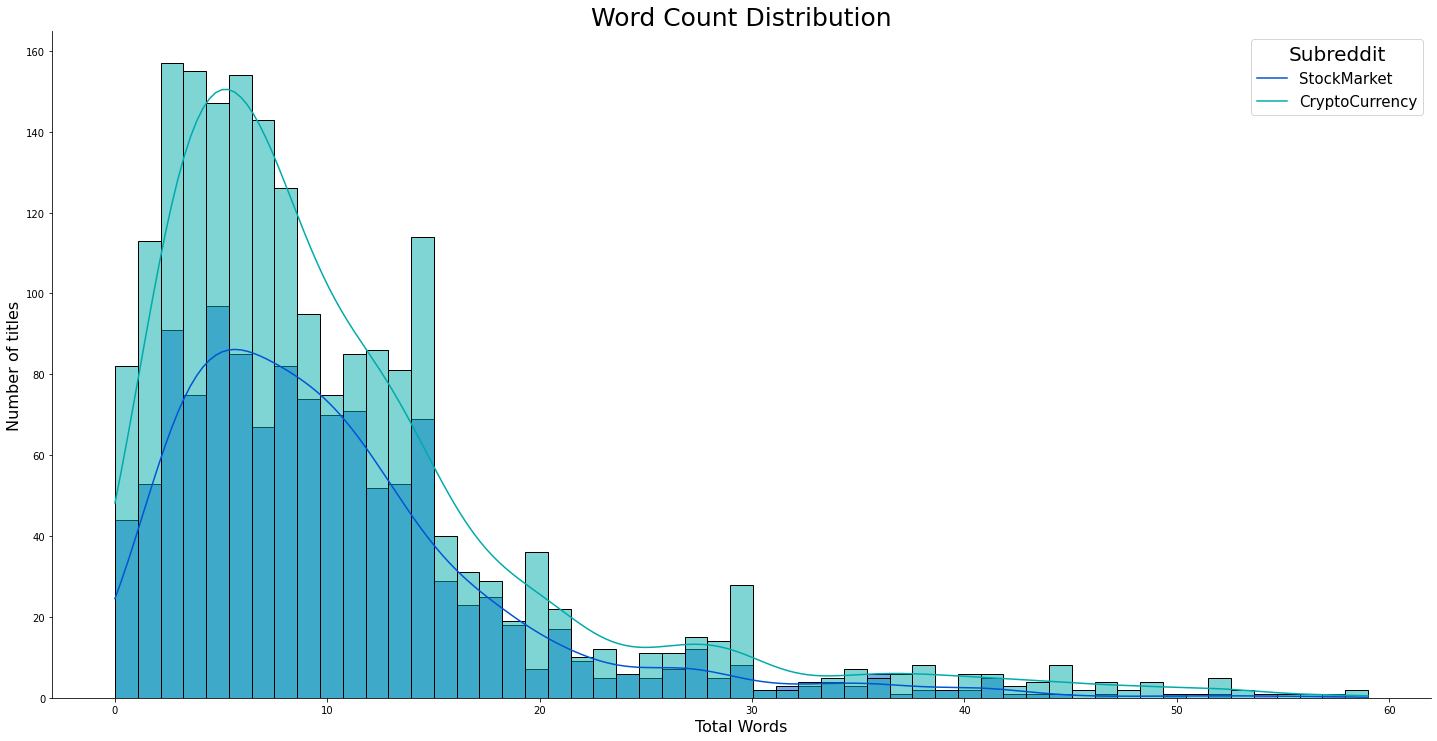

In [18]:
plt.figure(figsize=(16,8))
ax = sns.displot(data = data, 
            x = 'word_count',
            hue = 'subreddit',
            kde = True, 
            rug = False,
            height = 10,
            palette = 'winter_r',
            aspect = 2,
            legend = False)

plt.title('Word Count Distribution',fontsize = 25)
plt.xlabel('Total Words', fontsize=16)
plt.ylabel('Number of titles', fontsize=16)
plt.legend(title='Subreddit', loc='upper right', labels=['StockMarket', 'CryptoCurrency'],fontsize=15, title_fontsize=20)
plt.savefig('../image/bar_wordcount', bbox_inches='tight')

##### _In the words count distribution, it's clear that, overall, subreddit for `CryptoCurrency` has less words than `StockMarket` as they both tend to be positive skewed._ 

#### _Characters Count Distribution_

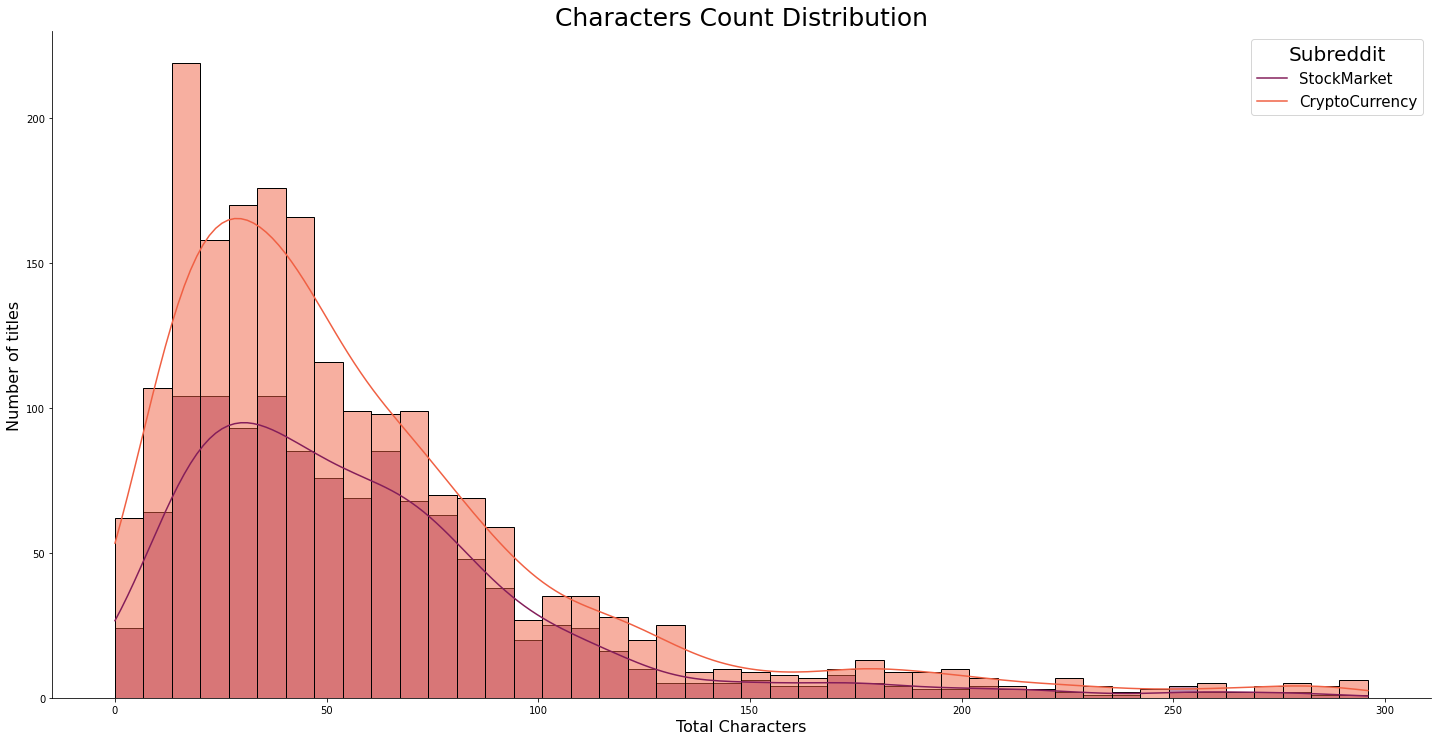

In [19]:
sns.displot(data = data, 
            x = 'character_count',
            hue = 'subreddit', 
            kde = True, 
            rug = False, 
            height = 10,
            palette = 'rocket_r',
            aspect = 2,
            legend = False)
plt.title('Characters Count Distribution', fontsize = 25)
plt.xlabel('Total Characters', fontsize=16)
plt.ylabel('Number of titles', fontsize=16)
plt.legend(title='Subreddit', loc='upper right', labels=['StockMarket', 'CryptoCurrency'],fontsize=15, title_fontsize=20)
plt.savefig('../image/bar_characterscount', bbox_inches='tight')

##### _Similar to Words Distribution, the characters distribution is following the same skewness where `CryptoCurrency` tends to have less characters than `StockMarket`._

#### _Top 15 Stop Words_

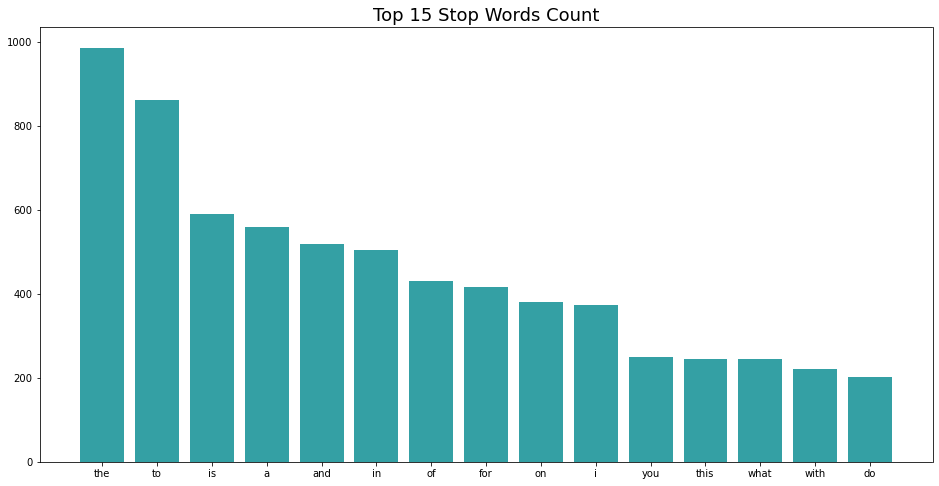

In [20]:
stop = set(stopwords.words('english'))
new_title = data['clean_title'].str.split()
new_title = new_title.values.tolist()
corpus = [word for i in new_title for word in i]
dic = defaultdict(int)
for word in corpus:
    if word in stop: 
        dic[word] +=1
top = sorted(dic.items(), key = lambda x: x[1], reverse = True)[:15]
x,y = zip(*top)
plt.figure(figsize=(16,8))
plt.title('Top 15 Stop Words Count', fontsize = 18)
plt.bar(x,y, color = '#34a0a4')
plt.savefig('../image/top_15_stopwords', bbox_inches='tight')

In [21]:
dic.items()

dict_items([('can', 105), ('why', 105), ('is', 591), ('after', 55), ('their', 43), ('any', 84), ('on', 380), ('this', 246), ('be', 143), ('in', 505), ('you', 249), ('to', 862), ('your', 116), ('has', 85), ('the', 987), ('with', 220), ('here', 88), ('a', 559), ('for', 417), ('above', 4), ('how', 139), ('it', 175), ('as', 125), ('up', 99), ('will', 97), ('and', 518), ('have', 151), ('of', 432), ('all', 85), ('over', 47), ('are', 192), ('most', 35), ('just', 97), ('by', 74), ('now', 86), ('before', 28), ('off', 23), ('we', 63), ('because', 20), ('its', 100), ('which', 38), ('what', 245), ('were', 12), ('our', 14), ('against', 11), ('do', 203), ('not', 199), ('out', 64), ('does', 74), ('at', 101), ('than', 41), ('i', 374), ('am', 122), ('doing', 19), ('or', 134), ('should', 71), ('from', 80), ('no', 42), ('they', 45), ('there', 38), ('who', 30), ('down', 52), ('into', 50), ('too', 11), ('my', 167), ('when', 56), ('if', 87), ('did', 25), ('about', 119), ('me', 70), ('again', 16), ('under', 

##### _In this project, stop words usually do not provide much information when modeling, but weather to remove this or not, will be determined while modeling._

#### _Top 15 Non-Stop Words_

##### _Plot for `StockMarket`_

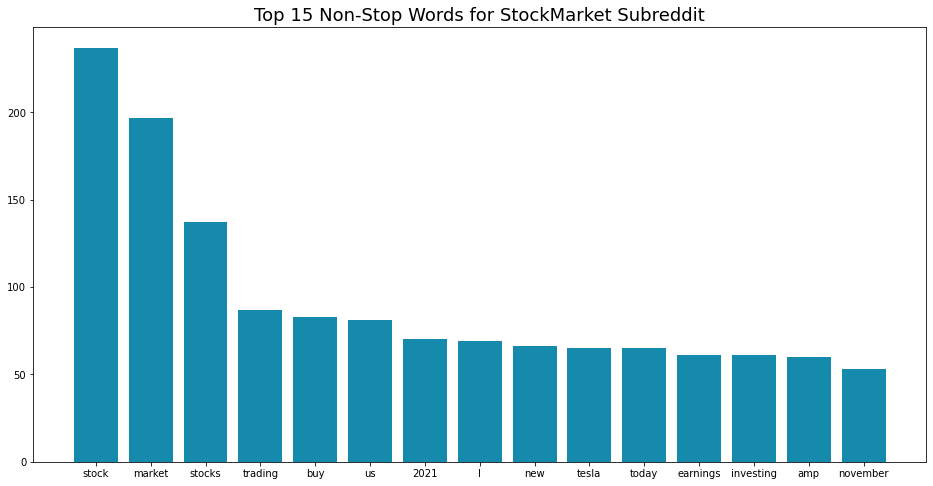

In [22]:
stop_word = set(stopwords.words('english'))
new_title = data[data['subreddit'] == 'StockMarket']['clean_title'].str.split()
new_title = new_title.values.tolist()
corpus = [word for i in new_title for word in i]

counter = Counter(corpus)
fre_word = counter.most_common()
x, y = [], []
for word, count in fre_word:
    if (word not in stop): 
        x.append(word)
        y.append(count)
x = x[:15]
y = y[:15]
plt.figure(figsize=(16,8))
plt.title('Top 15 Non-Stop Words for StockMarket Subreddit', fontsize = 18)
plt.bar(x,y, color = '#168aad')
plt.savefig('../image/nonstopwords_stock', bbox_inches='tight')

##### Plot for `CryptoCurrency`

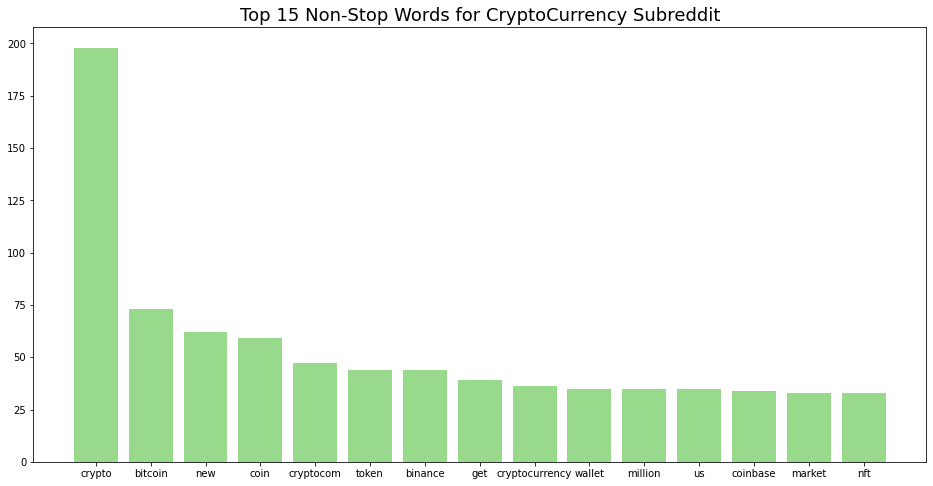

In [23]:
stop_word = set(stopwords.words('english'))
new_title = data[data['subreddit'] == 'CryptoCurrency']['clean_title'].str.split()
new_title = new_title.values.tolist()
corpus = [word for i in new_title for word in i]

counter = Counter(corpus)
fre_word = counter.most_common()
x, y = [], []
for word, count in fre_word:
    if (word not in stop): 
        x.append(word)
        y.append(count)
x = x[:15]
y = y[:15]
plt.figure(figsize=(16,8))
plt.title('Top 15 Non-Stop Words for CryptoCurrency Subreddit', fontsize = 18)
plt.bar(x,y, color = '#99d98c')
plt.savefig('../image/nonstopwords_crypto', bbox_inches='tight')

##### _The first Bar Chart provides some insights on the non-stop words for `StockMarket`.These words are, in general, the common words people would use when talk about trading stocks.On the other hand, `CryptoMarket` also have some direct words like $Crypto$ and $bitcoin$ which are commonly used words for `CryptoCurrency` topic. However, there are some word are frequently used in both `StockMarket` and `CryptoCurrency`._

#### _Sentiment Analysis_

In [24]:
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    plt.figure(figsize=(16,8))
    plt.title('Sentiment Score Distribution', fontsize = 15)
    polarity_score.hist(color ='#d9ed92')
    plt.savefig('../image/sentiment_bar', bbox_inches='tight')

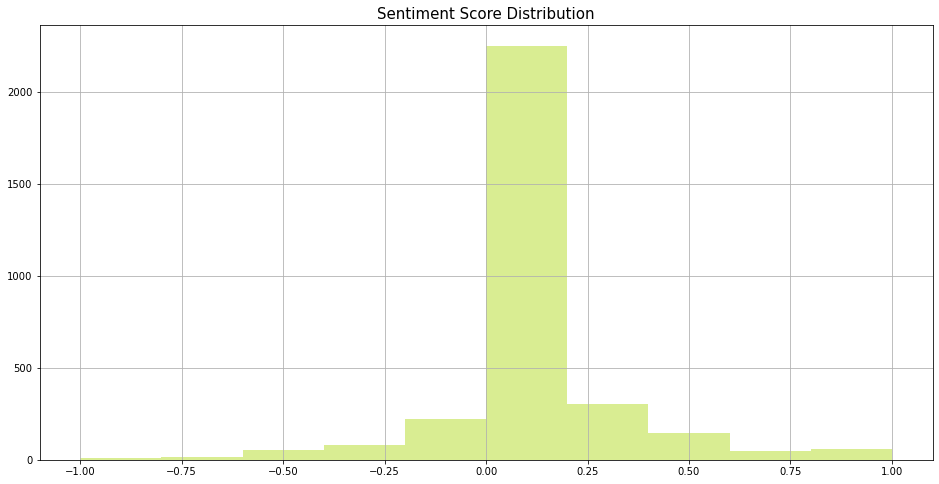

In [25]:
plot_polarity_histogram(data['clean_title'])

##### _In the above sentiment analysis, the distribution provided that most of the text data are neutral._

#### _Entities Analysis_

In [26]:
def plot_named_entity_barchart(text, name):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    plt.figure(figsize=(16,8))
    plt.title(name, fontsize = 15)  
    sns.barplot(x=y,y=x,palette='crest')

In [27]:
en_stock = new_title = data[data['subreddit'] == 'StockMarket']['clean_title'] # setting up the data for plotting for StockMarket

In [28]:
en_crypto = new_title = data[data['subreddit'] == 'CryptoCurrency']['clean_title'] # setting up the data for plotting for CryptoCurrency

##### _Plot for `StockMaket`_

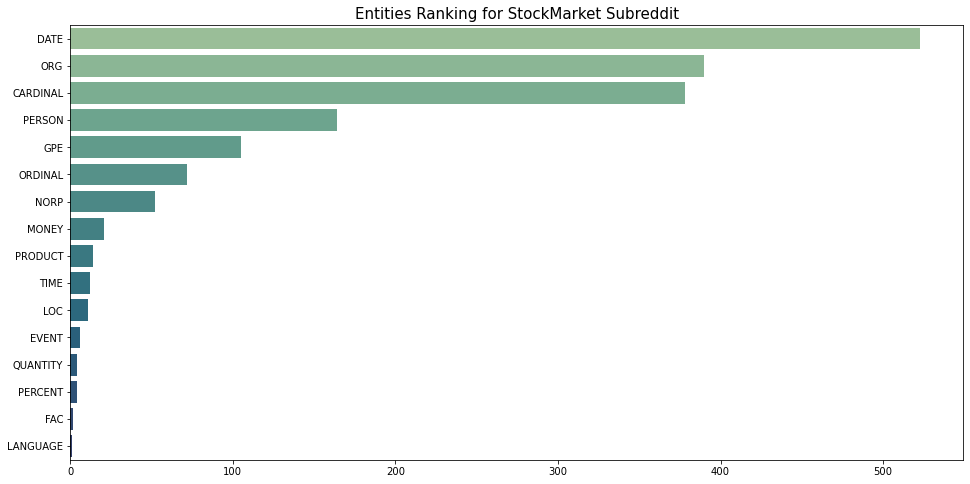

In [29]:
plot_named_entity_barchart(en_stock, 'Entities Ranking for StockMarket Subreddit')
plt.savefig('../image/entity_stock')

##### _Plot for `CryptoCurrency`_

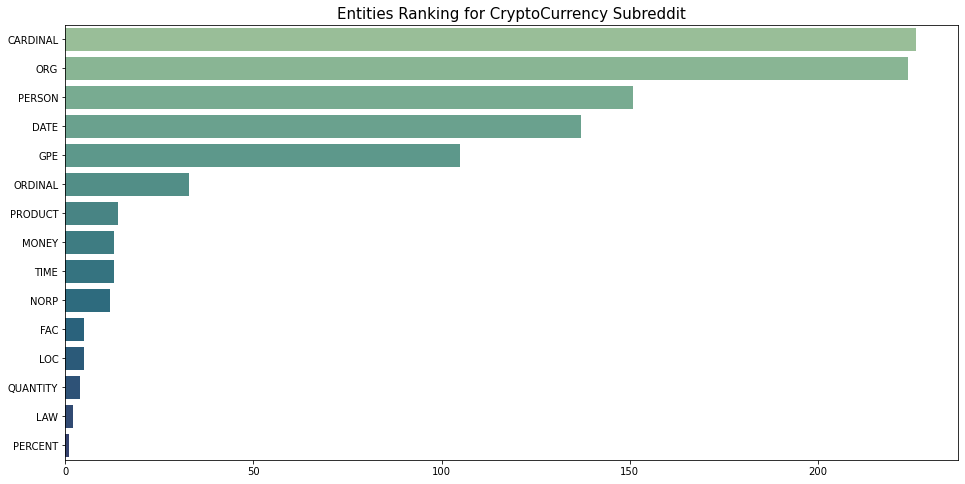

In [30]:
plot_named_entity_barchart(en_crypto, 'Entities Ranking for CryptoCurrency Subreddit')
plt.savefig('../image/entity_crypto', bbox_inches='tight')

##### _In `CryptoCurrency` subreddit, CARDINAL ranks as top entities and where DATE ranks as top one in `StockMarket` subreddit. This is also observed in previous word count analysis where `StockMarket` has more date related word in top 15 non-stop words._

#### WordCloud

In [31]:
stock_text = data[data['subreddit'] == 'StockMarket'].clean_title.str.cat() #converting all cell of text to one string 
stock_png = np.array(Image.open('../image/stock.jpeg')) # reading the mask 
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", 
               max_words=2000, 
               mask=stock_png,
               stopwords=stopwords,
               contour_width=1,
               contour_color='#5d0f24',
               colormap='RdGy')

##### _Plot for `StockMarket`_

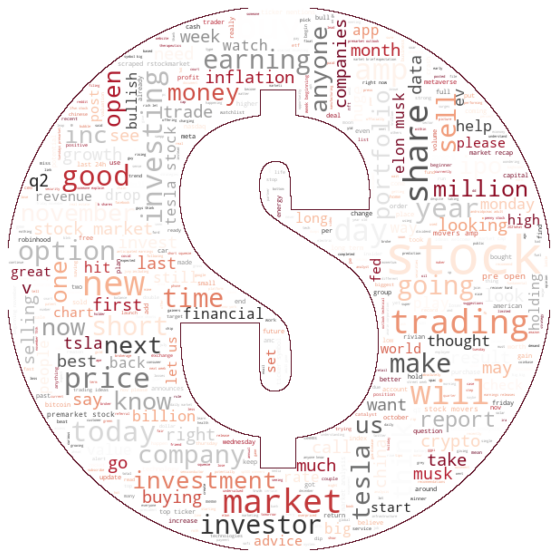

In [32]:
wc.generate(stock_text)
plt.figure (figsize = (10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show
plt.savefig('../image/wordcloud_stock')

##### _Plot for `CryptoCurrency`_

In [33]:
crypto_text = data[data['subreddit'] == 'CryptoCurrency'].clean_title.str.cat()
crypto_png = np.array(Image.open('../image/crypto.png'))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white",
               max_words=2000, 
               mask=crypto_png,
               stopwords=stopwords,
               contour_width=1,
               contour_color='#5d0f24',
               colormap='RdGy')

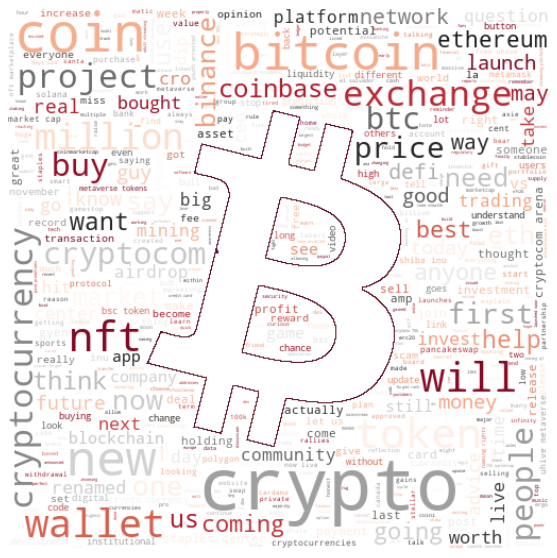

In [34]:
wc.generate(crypto_text)
plt.figure (figsize = (10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show
plt.savefig('../image/wordcloud_crypto')

##### _WordCloud provides a nice picture of how frequent different words appears both categories.This visual creates a direct high level view on the text data._

### EDA Summaries:
- In the EDA part, we have determined the two categories contains many overlap text. This may become a challenging part for future modeling. 
- `StockMarket` has most text in entity `Date` and `CryptoCurrency` has most text in entity `Cardinal`. This may become a good separator for out model's feature selections. 
- Based upon the sentiment analysis, we would not consider sentiment aspect to our modeling processes. 

### Saving New File for Modeling

In [35]:
data.to_csv("../data/reddit_data_clean.csv", index=False)

##### _As data cleaning with all the steps above, a new file is saved for modeling._

### continued on next workbook `Modeling`